<a href="https://colab.research.google.com/github/AndreaCastiella/Tensorflow2.0-Course-freeCodeCamp/blob/main/Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3

# Tensorflow Core Learning Algorithms

*   Linear Regression
*   Classification
*   Clustering
*   Hidden Markov Models



# Linear Regression

Linear regression is one of the most basic forms of machine learning and is used to predict numeric values.

This section is based on the following documentation: https://www.tensorflow.org/tutorials/estimator/linear

## How it works

Linear regression follows a very simple concept. If data points are related linearly, we can generate a line of best fit for these points and use it to predict future values.

In [1]:
!pip install -q sklearn

In [2]:
%tensorflow_version 2.x

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

##### Data

The dataset we will be focusing on here is the titanic dataset. It has tons of information about each passanger on the ship. 

In [ ]:
#Load dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
#print(dftrain.head())
y_train = dftrain.pop('survived') # it pops the data of (removes from dftrain and stores it in y_train)
y_eval = dfeval.pop('survived')
#print(dftrain.head())
#print(y_train)
#print(dftrain.loc[0], y_train.loc[0])

And if we want a more statistical analysis of our data we can use the .describe() method.

In [ ]:
dftrain.describe()

Shape

In [ ]:
dftrain.shape

**Generate graphs of the data**

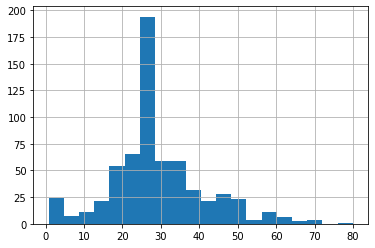

In [14]:
dftrain.age.hist(bins=20)

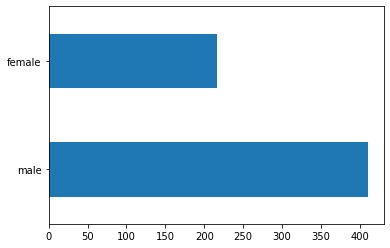

In [15]:
dftrain.sex.value_counts().plot(kind='barh')

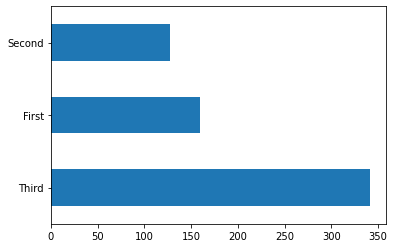

In [16]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '%survived')

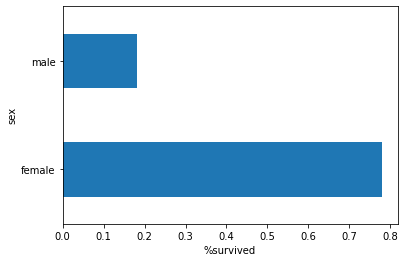

In [18]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('%survived')

##Training vs Testing Data
You may have noticed that we loaded two different datasets above. This is because when we train models, we need two sets of data: training and testing.

The training data is what we feed to the model so that it can develop and learn. It is usually a much larger size than the testing data.

The testing data is what we use to evaulate the model and see how well it is performing. We must use a seperate set of data that the model has not been trained on to evaluate it.**texto en negrita**

The point of our model is to be able to make predictions on NEW data, data that we have never seen before. If we simply test the model on the data that it has already seen we cannot measure its accuracy accuratly. We can't be sure that the model hasn't simply memorized our training data. This is why we need our testing and training data to be seperate.

In [21]:
dfeval.shape

(264, 9)

##Feature Columns
In our dataset we have two different kinds of information: Categorical and Numeric

Our categorical data is anything that is not numeric! For example, the sex column does not use numbers, it uses the words "male" and "female".

Before we continue and create/train a model we must convet our categorical data into numeric data. We can do this by encoding each category with an integer (ex. male = 1, female = 2).

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']

NUMERIC_COLUMS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique() # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

#print(feature_columns)

## The Training Process

For this specific model data is going to be streamed into it in small batches of 32. This means we will not feed the entire dataset to our model at once, but simply small batches of entries. We will feed these batches to our model multiple times according to the number of epochs.

An epoch is simply one The number of epochs we define is the amount of times our modstream of our entire dataset. el will see the entire dataset. We use multiple epochs in hope that after seeing the same data multiple times the model will better determine how to estimate it.

Ex. if we have 10 ephocs, our model will see the same dataset 10 times.

Since we need to feed our data in batches and multiple times, we need to create something called an input function. The input function simply defines how our dataset will be converted into batches at each epoch.

### Input Function

The TensorFlow model we are going to use requires that the data we pass it comes in as a tf.data.Dataset object. This means we must create a input function that can convert our current pandas dataframe into that object.

Below you'll see a seemingly complicated input function, this is straight from the TensorFlow documentation (https://www.tensorflow.org/tutorials/estimator/linear). 

In [23]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


### Creating the Model

We are going to use a linear estimator to utilize the linear regression algorithm.

In [24]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimator by passing the feature columns we created earlier.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp2k76bj77', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Training the Model

Pass the input functions that we created.

In [ ]:
linear_est.train(train_input_fn) # Train
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result) # the result variable is a dict of stats about the model
#print(result['accuracy'])


In [ ]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[24])
print(y_train[24])
print(result[24]['probabilities'][1])

# Classification

Where regression was used to predict a numeric value, classification is used to seperate data points into classes of different labels. In this example we will use a TensorFlow estimator to classify flowers.

This section is based on the following guide from the TensorFlow website. https://www.tensorflow.org/tutorials/estimator/premade

## Imports and Setups

In [2]:
%tensorflow_version 2.x

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import pandas as pd

## Dataset

This specific dataset seperates flowers into 3 different classes of species.

*   Setosa
*   Versicolor
*   Virginica


The information about each flower is the following.
*   sepal length
*   sepal width
*   petal length
*   petal width


In [8]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Viginica']

In [9]:
train_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Use Kera to gab our datasets and read them into a pandas dataframe.

In [10]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


Now we can pop the species column off and use it for our label.

In [11]:
train_y = train.pop('Species')
test_y = test.pop('Species')

train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [12]:
train.shape # we have 120 entires with 4 features

(120, 4)

## Input Function

In [19]:
def input_fn(features, labels, training=True, batch_size=256):
  # Convert the inputs to a Dataset
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

  # Shuffle and repeat if ou are in training mode
  if training:
    dataset = dataset.shuffle(1000).repeat()

  return dataset.batch(batch_size)

## Feature Columns

In [14]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


## Building the Model

And now we are ready to choose a model. For classification tasks there are variety of different estimators/models that we can pick from. Some options are listed below.


*   DNNClassifier (Deep Neural Network)
*   LinearClassifier

We can choose either model but the DNN seems to be the best choice. This is because we may not be able to find a linear coorespondence in our data.

In [17]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
feature_columns=my_feature_columns,
# Two hidden layers of 30 and 10 nodes respectively.
hidden_units = [30,10],
# The model must choose between 3 classes.
n_classes = 3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpyzah8281', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Training

In [ ]:
classifier.train(input_fn=lambda: input_fn(train, train_y, training=True), steps=5000)
# We include a lambda to avoid creating an inner function previously

In [23]:
eval_result = classifier.evaluate(input_fn=lambda: input_fn(test, test_y, training=False))
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-02-06T16:56:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpyzah8281/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.22859s
INFO:tensorflow:Finished evaluation at 2021-02-06-16:56:24
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.8333333, average_loss = 0.5004536, global_step = 10000, loss = 0.5004536
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: /tmp/tmpyzah8281/model.ckpt-10000

Test set accuracy: 0.833



## Predictions

Now that we have a trained model it's time to use it to make predictions. I've written a little script below that allows you to type the features of a flower and see a prediction for its class.

In [24]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0] # Index of class with most propabibity
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))


Please type numeric values as prompted.
SepalLength: 2.3
SepalWidth: 2.2
PetalLength: 0.5
PetalWidth: 0.8
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpyzah8281/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (73.0%)


# Clustering

Clustering is a Machine Learning technique that involves the grouping of data points. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. (https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

Unfortunalty there are issues with the current version of TensorFlow and the implementation for KMeans. This means we cannot use KMeans without writing the algorithm from scratch. We aren't quite at that level yet, so we'll just explain the basics of clustering for now.

Basic Algorithm for K-Means.

*   Step 1: Randomly pick K points to place K centroids
*   Step 2: Assign all the data points to the centroids by distance. The closest centroid to a point is the one it is assigned to.
*   Step 3: Average all the points belonging to each centroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position.
*   Step 4: Reassign every point once again to the closest centroid.
*   Step 5: Repeat steps 3-4 until no point changes which centroid it belongs to.




# Hidden Markov Models

"The Hidden Markov Model is a finite set of states, each of which is associated with a (generally multidimensional) probability distribution []. Transitions among the states are governed by a set of probabilities called transition probabilities." (http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html)

A hidden markov model works with probabilities to predict future events or states. In this section we will learn how to create a hidden markov model that can predict the weather.

This section is based on the following TensorFlow tutorial. https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel

## Data

In the previous sections we worked with large datasets of 100's of different entries. For a markov model we are only interested in probability distributions that have to do with states.

We can find these probabilities from large datasets or may already have these values. We'll run through an example in a second that should clear some things up, but let's discuss the components of a markov model.

States: In each markov model we have a finite set of states. These states could be something like "warm" and "cold" or "high" and "low" or even "red", "green" and "blue". These states are "hidden" within the model, which means we do not direcly observe them.

Observations: Each state has a particular outcome or observation associated with it based on a probability distribution. An example of this is the following: On a hot day Tim has a 80% chance of being happy and a 20% chance of being sad.

Transitions: Each state will have a probability defining the likelyhood of transitioning to a different state. An example is the following: a cold day has a 30% chance of being followed by a hot day and a 70% chance of being follwed by another cold day.

To create a hidden markov model we need.

*   States
*   Observation Distribution
*   Transition Distribution


For our purpose we will assume we already have this information available as we attempt to predict the weather on a given day.


## Imports and Setup

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow as tf

## Weather Model

Taken direclty from the TensorFlow documentation (https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel).

We will model a simple weather system and try to predict the temperature on each day given the following information.

*   Cold days are encoded by a 0 and hot days are encoded by a 1.
*   The first day in our sequence has an 80% chance of being cold.
*   A cold day has a 30% chance of being followed by a hot day.
*   A hot day has a 20% chance of being followed by a cold day.
*   On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.


In [4]:
tfd = tfp.distributions # shortcut
initial_distribution = tfd.Categorical(probs=[0.8, 0.2]) # Refer to point 2
transition_distribution = tfd.Categorical(probs=[[0.7, 0.3], [0.2, 0.8]]) # Refer to point 3 and 4
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.]) # Refer to point 5

# The loc argument represents the mean and the scale is the standard deviation.

Create hidden Markov model

In [7]:
model = tfd.HiddenMarkovModel(initial_distribution=initial_distribution, 
                              transition_distribution=transition_distribution,
                              observation_distribution=observation_distribution,
                              num_steps=7)

The number of steps represents the number of days that we would like to predict information for. In this case we've chosen 7, an entire week.

To get the expected temperatures on each day we can do the following.

In [8]:
mean = model.mean()

# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

# in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()

with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]
